# K-means algorithm

In this notebook, K-means algorithm will be used for image compression by reducing the number of colors that occur in an image to only those that are most common in that image.

The code is adapted from Andrew Ng's 'Machine Learning Specialiation' course to accomplish the homework assignment. 


# Outline
- [ 1 - Import Packages](#1)
- [ 2 - Load the Data](#2)
- [ 3 - Main Functions](#3)
- [ 4 - Train the Agent](#4)
- [ 5 - Visualize the results](#5)

<a name="1"></a>
## 1 - Import Packages

In [8]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a name="2"></a>
## 2 - Load the Data

In [46]:
# Load an image 
original_img = plt.imread('mountain.jpg')

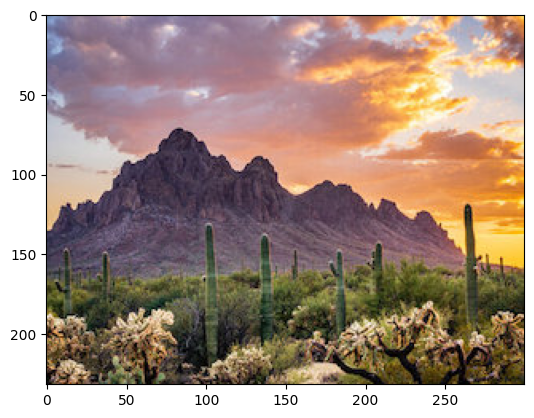

In [47]:
# Visualizing the image
plt.imshow(original_img)

In [48]:
# Divide by 255 so that all values are in the range 0 - 1 (not needed for PNG files)
original_img = original_img / 255

# Reshape the matrix original_img to create an 𝑚×3 matrix of pixel colors, where 𝑚 = 16384 = 128×128)
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

<a name="3"></a>
## 3 - Main Functions

In [13]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """
    K = centroids.shape[0] # number of centroids
    M = X.shape[0] # number of data points
    dimension = X.shape[1] # dimension of each data point
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(M):   
        distance = [] # Array to hold distance between X[i] and each centroids[j]
        for j in range(K):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)
        idx[i] = np.argmin(distance)
    return idx

In [14]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):   
          points = X[idx == k] # points whose assigned centroid index is k
          centroids[k] = np.mean(points, axis=0)   
    return centroids

In [15]:
def run_kMeans(X, initial_centroids, max_iters=10):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

In [16]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

<a name="4"></a>
## 4 - Helper Functions

In [70]:
# Plot the colors of the image and mark the centroids in a 3D space 
def plot_kMeans_RGB(X, centroids, idx, K):
    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(221, projection='3d')
    ax.scatter(*X.T*255, zdir='z', depthshade=False, s=.02, c=X)
    ax.scatter(*centroids.T*255, zdir='z', depthshade=False, s=1500, c='red', marker='x', lw=2)
    ax.set_xlabel('R value - Redness')
    ax.set_ylabel('G value - Greenness')
    ax.set_zlabel('B value - Blueness')
    ax.w_yaxis.set_pane_color((0., 0., 0., .2))
    ax.set_title("Original colors and their color clusters' centroids")
    plt.show()

In [22]:
# Visualize the K colors selected
def show_centroid_colors(centroids):
    palette = np.expand_dims(centroids, axis=0)
    num = np.arange(0,len(centroids))
    plt.figure(figsize=(16, 16))
    plt.xticks(num)
    plt.yticks([])
    plt.imshow(palette)

<a name="5"></a>
## 5 - Train the Agent

In a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.

An image can contain thousands of colors, with K-means, the number of colors can be reduced to the number of the centroids.

In [49]:
K = 16 # number of centroids 
max_iters = 10

initial_centroids = kMeans_init_centroids(X_img, K)

centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

<a name="6"></a>
## 6 - Visualize the results

/var/folders/1n/97rlgs_n2y99xylp3q9q_d840000gn/T/ipykernel_20224/3876853377.py:10: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((0., 0., 0., .2))


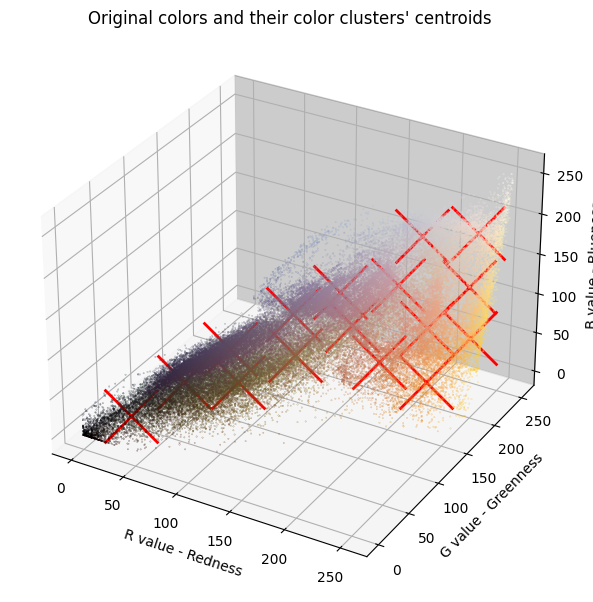

In [71]:
# Plot the colors of the image and mark the centroids
plot_kMeans_RGB(X_img, centroids, idx, K)

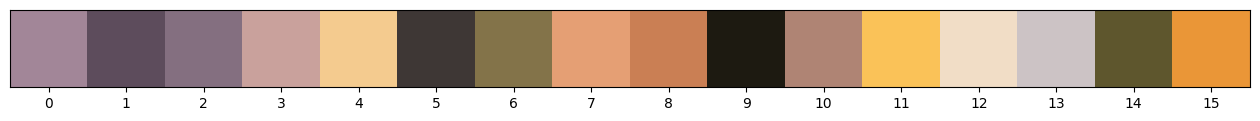

In [51]:
# Visualize the K colors selected
show_centroid_colors(centroids)

In [52]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

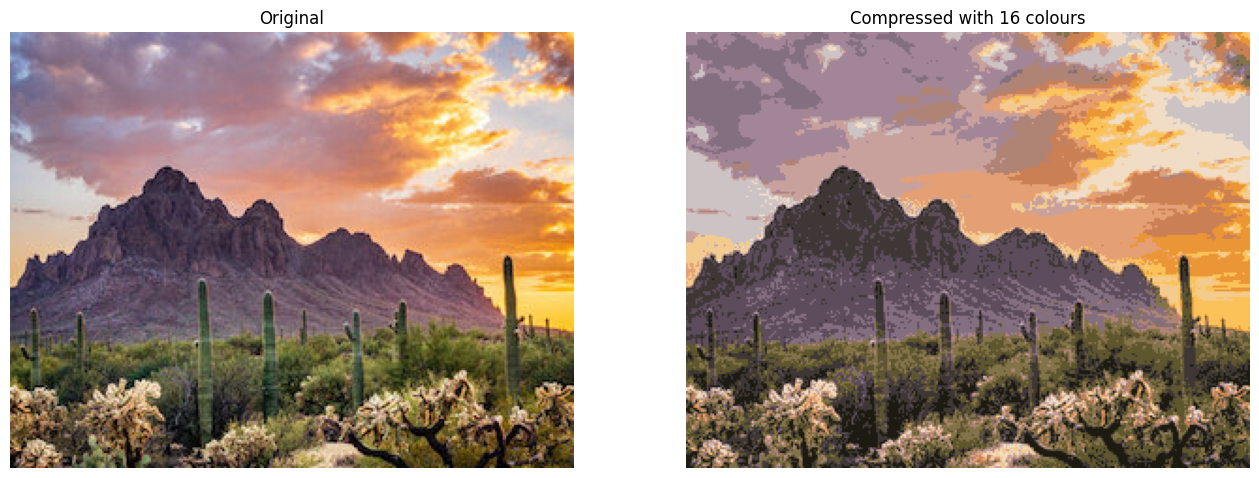

In [53]:
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')
# Display original image
ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()

# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()